### Change of Mind
### scaled up analysis from 1.1

### 3. Change of Mind triggered animal trajectory and replay

In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
import spyglass as nd
import pandas as pd
import numpy as np
import xarray as xr
from scipy import stats
from scipy import linalg
import os
import pickle
import matplotlib.pyplot as plt
from ripple_detection.core import segment_boolean_series

from spyglass.common import (Session, IntervalList,LabMember, LabTeam, Raw, Session, Nwbfile,
                            Electrode,LFPBand,interval_list_intersect)
from spyglass.common import TaskEpoch
from spyglass.spikesorting.v0 import (SortGroup, 
                                    SpikeSortingRecording,SpikeSortingRecordingSelection)
from spyglass.utils.nwb_helper_fn import get_nwb_copy_filename
from spyglass.common.common_position import IntervalPositionInfo, RawPosition, IntervalLinearizedPosition, TrackGraph

[2025-03-03 09:45:40,120][INFO]: Connecting shijiegu-alt@lmf-db.cin.ucsf.edu:3306
[2025-03-03 09:45:40,194][INFO]: Connected shijiegu-alt@lmf-db.cin.ucsf.edu:3306


In [3]:
from spyglass.shijiegu.Analysis_SGU import TrialChoice,EpochPos,MUA,get_linearization_map
from spyglass.shijiegu.decodeHelpers import runSessionNames
from spyglass.shijiegu.ripple_add_replay import plot_decode_spiking,select_subset_helper
from spyglass.shijiegu.changeOfMind import (find_turnaround_time, findProportion,
            find_trials, load_epoch_data_wrapper, find_direction, find_trials_animal)
from spyglass.shijiegu.changeOfMind_triggered import turnaround_triggered_position, turnaround_triggered_decode
from spyglass.shijiegu.load import load_decode

[09:45:52][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	TrackGraph -> spyglass.linearization.v0.main.TrackGraph
Please use the new location.
[09:45:52][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	TrackGraph -> spyglass.linearization.v0.main.TrackGraph
Please use the new location.
[09:45:52][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	TrackGraph -> spyglass.linearization.v0.main.TrackGraph
Please use the new location.
[09:45:52][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	TrackGraph -> spyglass.linearization.v0.main.TrackGraph
Please use the new location.


### for many sessions/day

In [4]:
from spyglass.shijiegu.changeOfMind_triggered import (find_triggered_animal,
    plot_physical_vs_mental_position, parse_to_transitions, find_large_position_minus_decode_trials)

#### (a) Mental position vs physical position
This time, we include 1 second after turn around.

In [144]:
triggered_positions = {}
triggered_positions_abs = {}
triggered_decodes = {}
triggered_decodes_baseoff = {}
triggered_decodes_abs = {}
triggered_trial_info = {}

animal = 'Lewis'
dates_to_plot = ['20240109','20240110']
#dates_to_plot = ['20240106','20240107','20240108','20240109']
                 #'20240110','20240113']

encoding_set = '2Dheadspeed_above_4'
classifier_param_name = 'default_decoding_gpu_4armMaze'
datafolder = f'/cumulus/shijie/behavior_pilot/Batch1/{animal}'

(triggered_positions[animal], triggered_positions_abs[animal],
 triggered_decodes[animal], triggered_decodes_baseoff[animal], triggered_decodes_abs[animal],
 triggered_trial_info[animal]) = find_triggered_animal(animal,dates_to_plot,
                                                                   delta_t_minus = 0,delta_t_plus = 1,
                                                                   max_flag = 0, segment_only = True)

animal = 'Eliot'
#dates_to_plot = ['20221018','20221019','20221020','20221021','20221022','20221023','20221024','20221025','20221026']
dates_to_plot = ['20221021']
encoding_set = '2Dheadspeed_above_4_andlowmua'
classifier_param_name = 'default_decoding_gpu_4armMaze'
datafolder = f'/cumulus/shijie/behavior_pilot/Batch1/{animal}'

(triggered_positions[animal], triggered_positions_abs[animal],
 triggered_decodes[animal], triggered_decodes_baseoff[animal], triggered_decodes_abs[animal],
 triggered_trial_info[animal]) = find_triggered_animal(animal,dates_to_plot,
                                                                   delta_t_minus = 0,delta_t_plus = 1,
                                                                   max_flag = 0, segment_only = True)

animal = 'Haydn'
dates_to_plot = ['20230606']
encoding_set = '2Dheadspeed_above_4'
classifier_param_name = 'default_decoding_gpu_4arm'
datafolder = f'/cumulus/shijie/behavior_pilot/Batch1/{animal}'

(triggered_positions[animal], triggered_positions_abs[animal],
 triggered_decodes[animal], triggered_decodes_baseoff[animal], triggered_decodes_abs[animal],
 triggered_trial_info[animal]) = find_triggered_animal(animal,dates_to_plot,
                                                                   delta_t_minus = 0,delta_t_plus = 1,
                                                                   max_flag = 0, segment_only = True)

[15:55:54][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
02_Rev2Session1
pos 1 valid times


[15:55:55][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
04_Rev2Session2
pos 3 valid times


[15:55:57][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
06_Rev2Session3
pos 5 valid times


[15:55:58][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
08_Rev2Session4
pos 7 valid times


[15:55:59][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
02_Rev2Session1
pos 1 valid times


[15:56:01][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
04_Rev2Session2
pos 3 valid times


[15:56:03][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
06_Rev2Session3
pos 5 valid times


[15:56:04][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
08_Rev2Session4
pos 7 valid times


[15:56:04][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
10_Rev2Session5
pos 9 valid times


[15:56:05][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
02_Seq2Session1
pos 1 valid times


[15:56:06][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
04_Seq2Session2
pos 3 valid times


[15:56:07][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
06_Seq2Session3
pos 5 valid times


[15:56:08][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
08_Seq2Session4
pos 7 valid times


[15:56:09][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
02_Rev3Session1
pos 1 valid times


[15:56:11][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
04_Rev3Session2
pos 3 valid times


[15:56:13][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
06_Rev3Session3
pos 5 valid times


[15:56:14][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
08_Rev3Session4
pos 7 valid times


[15:56:15][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
10_Rev3Session5
pos 9 valid times


[15:37:05][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	TrackGraph -> spyglass.linearization.v0.main.TrackGraph
Please use the new location.
[15:37:05][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	TrackGraph -> spyglass.linearization.v0.main.TrackGraph
Please use the new location.


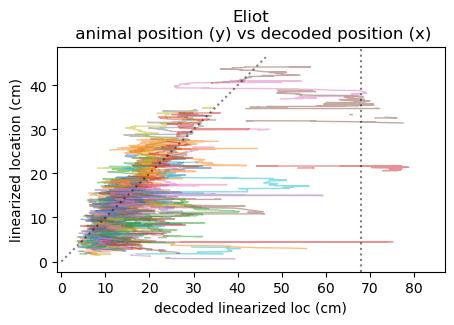

In [103]:
plot_physical_vs_mental_position("Eliot",triggered_positions_abs["Eliot"],triggered_decodes_baseoff["Eliot"])

In [ ]:
### test begin

[09:47:19][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
02_Seq2Session1
pos 1 valid times


[09:47:20][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
04_Seq2Session2
pos 3 valid times


[09:47:21][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
06_Seq2Session3
pos 5 valid times


[09:47:21][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
08_Seq2Session4
pos 7 valid times


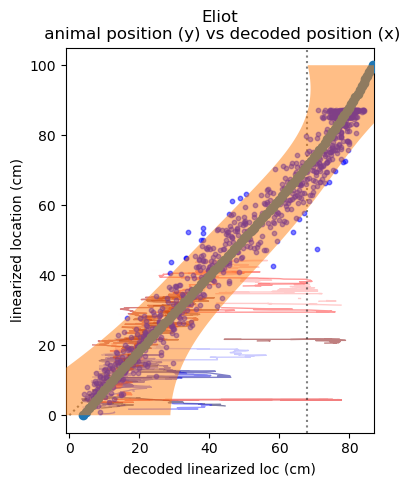

In [109]:
### test end

66


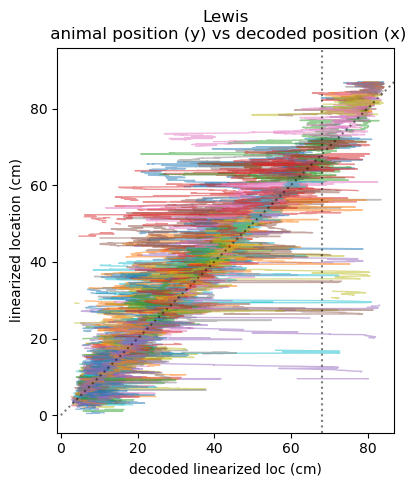

In [104]:
plot_physical_vs_mental_position("Lewis",triggered_positions_abs["Lewis"],triggered_decodes_baseoff["Lewis"])

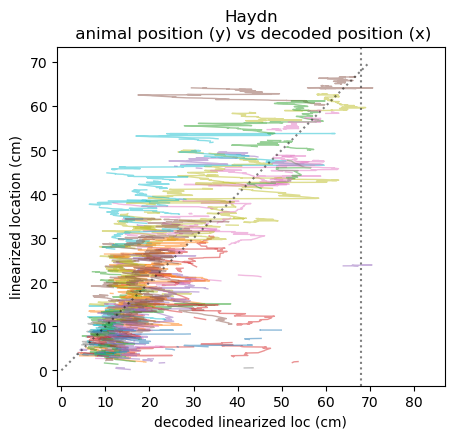

In [105]:
plot_physical_vs_mental_position("Haydn",triggered_positions_abs["Haydn"],triggered_decodes_baseoff["Haydn"])

#### (a2) Pre-stopping

In [21]:
triggered_positions_pre = {}
triggered_positions_abs_pre = {}
triggered_decodes_pre = {}
triggered_decodes_baseoff_pre = {}
triggered_decodes_abs_pre = {}
triggered_trial_info_pre = {}

animal = 'Lewis'
dates_to_plot = ['20240109','20240110']
#dates_to_plot = ['20240106','20240107','20240108','20240109']
                 #'20240110','20240113']

encoding_set = '2Dheadspeed_above_4'
classifier_param_name = 'default_decoding_gpu_4armMaze'
datafolder = f'/cumulus/shijie/behavior_pilot/Batch1/{animal}'

(triggered_positions_pre[animal], triggered_positions_abs_pre[animal],
 triggered_decodes_pre[animal], triggered_decodes_baseoff_pre[animal], triggered_decodes_abs_pre[animal],
 triggered_trial_info_pre[animal]) = find_triggered_animal(animal,dates_to_plot,
                                                                   delta_t_minus = 1,delta_t_plus = 0,
                                                                   max_flag = 0, segment_only = True)

animal = 'Eliot'
#dates_to_plot = ['20221018','20221019','20221020','20221021','20221022','20221023','20221024','20221025','20221026']
dates_to_plot = ['20221021']
encoding_set = '2Dheadspeed_above_4_andlowmua'
classifier_param_name = 'default_decoding_gpu_4armMaze'
datafolder = f'/cumulus/shijie/behavior_pilot/Batch1/{animal}'

(triggered_positions_pre[animal], triggered_positions_abs_pre[animal],
 triggered_decodes_pre[animal], triggered_decodes_baseoff_pre[animal], triggered_decodes_abs_pre[animal],
 triggered_trial_info_pre[animal]) = find_triggered_animal(animal,dates_to_plot,
                                                                   delta_t_minus = 1,delta_t_plus = 0,
                                                                   max_flag = 0, segment_only = True)

animal = 'Haydn'
dates_to_plot = ['20230606']
encoding_set = '2Dheadspeed_above_4'
classifier_param_name = 'default_decoding_gpu_4arm'
datafolder = f'/cumulus/shijie/behavior_pilot/Batch1/{animal}'

(triggered_positions_pre[animal], triggered_positions_abs_pre[animal],
 triggered_decodes_pre[animal], triggered_decodes_baseoff_pre[animal], triggered_decodes_abs_pre[animal],
 triggered_trial_info_pre[animal]) = find_triggered_animal(animal,dates_to_plot,
                                                                   delta_t_minus = 1,delta_t_plus = 0,
                                                                   max_flag = 0, segment_only = True)

[15:17:56][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
02_Rev2Session1
pos 1 valid times


[15:17:58][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
04_Rev2Session2
pos 3 valid times


[15:18:00][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
06_Rev2Session3
pos 5 valid times


[15:18:01][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
08_Rev2Session4
pos 7 valid times


[15:18:02][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
02_Rev2Session1
pos 1 valid times


[15:18:04][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
04_Rev2Session2
pos 3 valid times


[15:18:05][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
06_Rev2Session3
pos 5 valid times


[15:18:06][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
08_Rev2Session4
pos 7 valid times


[15:18:07][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
10_Rev2Session5
pos 9 valid times


[15:18:07][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
02_Seq2Session1
pos 1 valid times


[15:18:09][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
04_Seq2Session2
pos 3 valid times


[15:18:10][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
06_Seq2Session3
pos 5 valid times


[15:18:11][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
08_Seq2Session4
pos 7 valid times


[15:18:11][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
02_Rev3Session1
pos 1 valid times


[15:18:13][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
04_Rev3Session2
pos 3 valid times


[15:18:13][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
06_Rev3Session3
pos 5 valid times


[15:18:14][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
08_Rev3Session4
pos 7 valid times


[15:18:15][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
10_Rev3Session5
pos 9 valid times


In [13]:
#%debug

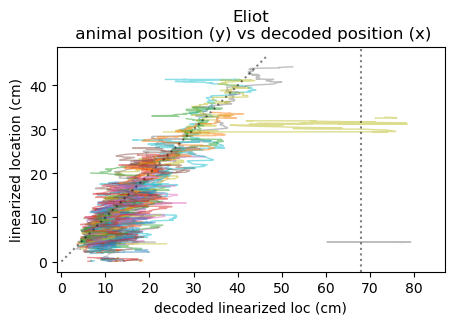

In [22]:
plot_physical_vs_mental_position("Eliot",triggered_positions_abs_pre["Eliot"],triggered_decodes_baseoff_pre["Eliot"])

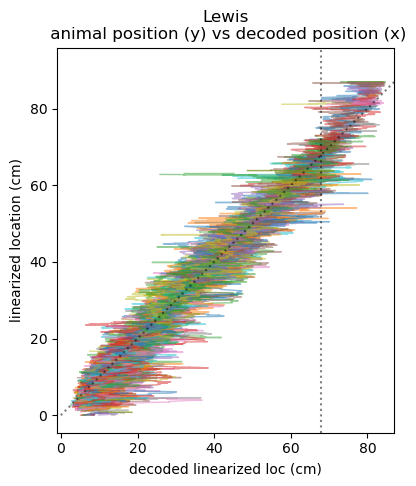

In [23]:
plot_physical_vs_mental_position("Lewis",triggered_positions_abs_pre["Lewis"],triggered_decodes_baseoff_pre["Lewis"])

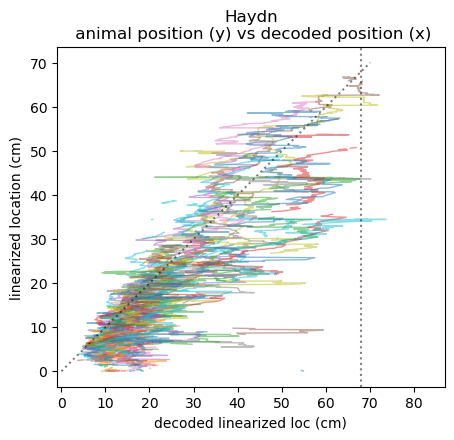

In [24]:
plot_physical_vs_mental_position("Haydn",triggered_positions_abs_pre["Haydn"],triggered_decodes_baseoff_pre["Haydn"])

In [35]:
animal = 'Lewis'
dates_to_plot = ['20240116','20240117']
#dates_to_plot = ['20240106','20240107','20240108','20240109']
                 #'20240110','20240113']

encoding_set = '2Dheadspeed_above_4'
classifier_param_name = 'default_decoding_gpu_4armMaze'
datafolder = f'/cumulus/shijie/behavior_pilot/Batch1/{animal}'

(triggered_positions_pre[animal], triggered_positions_abs_pre[animal],
 triggered_decodes_pre[animal], triggered_decodes_baseoff_pre[animal], triggered_decodes_abs_pre[animal],
 triggered_trial_info_pre[animal]) = find_triggered_animal(animal,dates_to_plot,
                                                                   delta_t_minus = 1,delta_t_plus = 0,
                                                                   max_flag = 0, segment_only = True)

[15:34:20][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
02_Rev1Session1
pos 1 valid times


[15:34:23][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
04_Rev1Session2
pos 3 valid times


[15:34:30][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
06_Rev1Session3
pos 5 valid times


[15:34:36][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
08_Rev1Session4
pos 7 valid times


[15:34:38][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
02_Rev1Session2
pos 1 valid times


[15:34:43][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
04_Rev1Session3
pos 3 valid times


[15:34:44][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
06_Rev1Session4
pos 5 valid times


In [31]:
#%debug

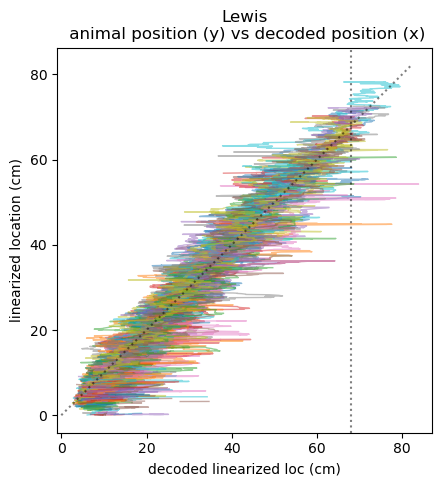

In [36]:
plot_physical_vs_mental_position("Lewis",triggered_positions_abs_pre["Lewis"],triggered_decodes_baseoff_pre["Lewis"])

In [39]:
triggered_positions = {}
triggered_positions_abs = {}
triggered_decodes = {}
triggered_decodes_baseoff = {}
triggered_decodes_abs = {}
triggered_trial_info = {}

(triggered_positions[animal], triggered_positions_abs[animal],
 triggered_decodes[animal], triggered_decodes_baseoff[animal], triggered_decodes_abs[animal],
 triggered_trial_info[animal]) = find_triggered_animal(animal,dates_to_plot,
                                                                   delta_t_minus = 0,delta_t_plus = 1,
                                                                   max_flag = 0, segment_only = True)

[15:36:49][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
02_Rev1Session1
pos 1 valid times


[15:36:49][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
04_Rev1Session2
pos 3 valid times


[15:36:52][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
06_Rev1Session3
pos 5 valid times


[15:36:53][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
08_Rev1Session4
pos 7 valid times


[15:36:54][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
02_Rev1Session2
pos 1 valid times


[15:36:56][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
04_Rev1Session3
pos 3 valid times


[15:36:57][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
06_Rev1Session4
pos 5 valid times


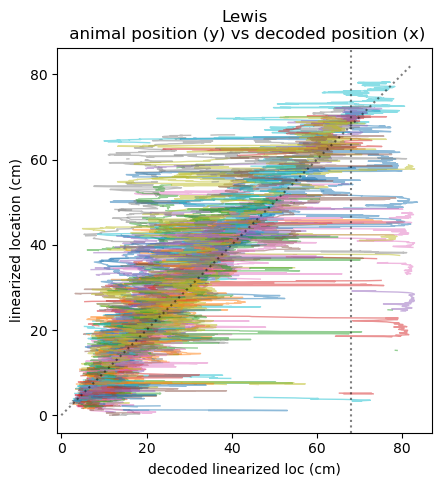

In [40]:
plot_physical_vs_mental_position("Lewis",triggered_positions_abs["Lewis"],triggered_decodes_baseoff["Lewis"])

In [42]:
(triggered_positions[animal], triggered_positions_abs[animal],
 triggered_decodes[animal], triggered_decodes_baseoff[animal], triggered_decodes_abs[animal],
 triggered_trial_info[animal]) = find_triggered_animal(animal,dates_to_plot,
                                                                   delta_t_minus = 2,delta_t_plus = 0.5,
                                                                   max_flag = 0, segment_only = True, nearby = 1)

[15:39:12][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
02_Rev1Session1
pos 1 valid times


[15:39:13][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
04_Rev1Session2
pos 3 valid times


[15:39:15][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
06_Rev1Session3
pos 5 valid times


[15:39:17][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
08_Rev1Session4
pos 7 valid times


[15:39:17][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
02_Rev1Session2
pos 1 valid times


[15:39:19][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
04_Rev1Session3
pos 3 valid times


[15:39:20][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
06_Rev1Session4
pos 5 valid times


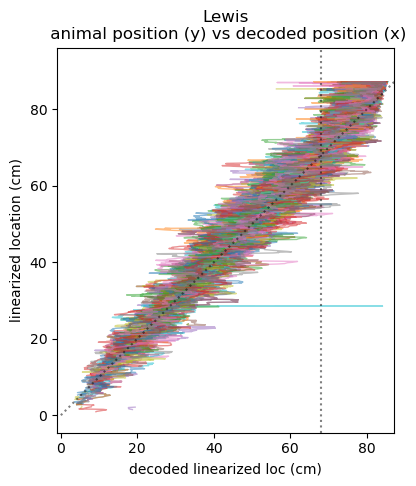

In [43]:
plot_physical_vs_mental_position("Lewis",triggered_positions_abs["Lewis"],triggered_decodes_baseoff["Lewis"])

#### (b) Histogram of the max physical minus CA1 decode difference

In [112]:
def position_minus_decode_histogram(animal, triggered_positions_abs, triggered_decodes_baseoff):
    diff = []
    (positions_abs, decodes_abs) = (triggered_positions_abs[animal], triggered_decodes_baseoff[animal])
        
    for rendition_ind in range(len(positions_abs)):
        position_abs = positions_abs[rendition_ind]
        decode_abs = decodes_abs[rendition_ind]
        if len(position_abs) == len(decode_abs):
            diff.append(np.nanmax(decode_abs - position_abs))
    
    #diff = np.concatenate(diff)

    return diff

In [123]:
animal = "Eliot"
diff = position_minus_decode_histogram(animal, triggered_positions_abs, triggered_decodes_baseoff)

Text(0, 0.5, 'density')

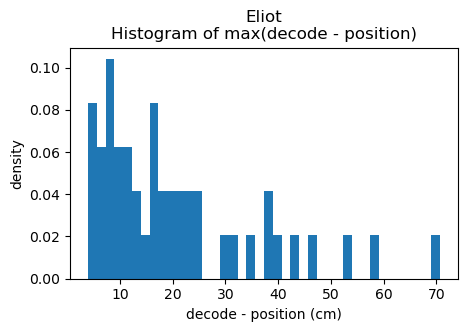

In [126]:
plt.figure(figsize=(5,3))
ax1 = plt.gca()
ax1.hist(diff,bins = 40,weights = np.ones(len(diff))/len(diff));
ax1.set_title(animal + "\nHistogram of max(decode - position)")
ax1.set_xlabel("decode - position (cm)")
ax1.set_ylabel("density")

In [118]:
animal = "Lewis"
diff = position_minus_decode_histogram(animal, triggered_positions_abs, triggered_decodes_baseoff)

Text(0, 0.5, 'density')

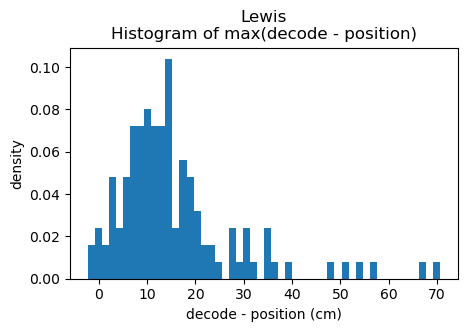

In [121]:
plt.figure(figsize=(5,3))
ax1 = plt.gca()

data = diff
ax1.hist(data,bins = 50,weights = np.ones(len(data))/len(data));
ax1.set_title(animal + "\nHistogram of max(decode - position)")
ax1.set_xlabel("decode - position (cm)")
ax1.set_ylabel("density")

In [127]:
animal = "Haydn"
diff = position_minus_decode_histogram(animal, triggered_positions_abs, triggered_decodes_baseoff)

Text(0, 0.5, 'density')

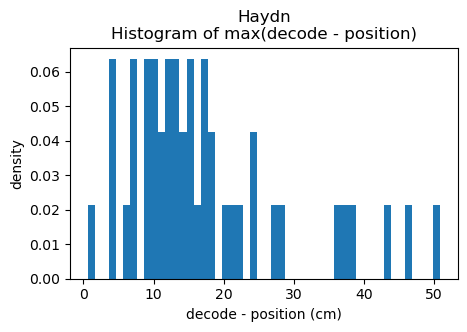

In [130]:
plt.figure(figsize=(5,3))
ax1 = plt.gca()

data = diff
ax1.hist(data,bins = 50,weights = np.ones(len(data))/len(data));
ax1.set_title(animal + "\nHistogram of max(decode - position)")
ax1.set_xlabel("decode - position (cm)")
ax1.set_ylabel("density")

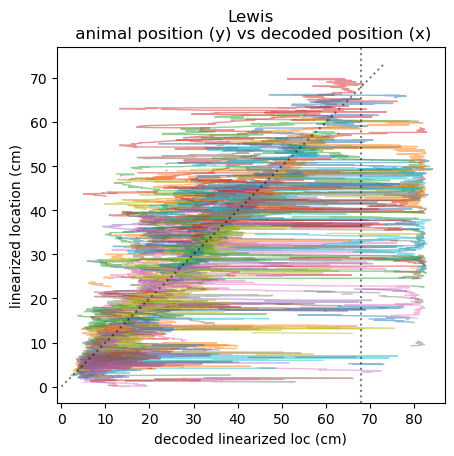

In [543]:
animal = "Lewis"
replay_trials, inds = find_large_position_minus_decode_trials(animal, triggered_trial_info, 
                                            triggered_positions_abs, triggered_decodes_baseoff,cutoff = CUTOFF)
plot_physical_vs_mental_position(animal,
                                 [triggered_positions_abs[animal][xi] for xi in inds],
                                 [triggered_decodes_baseoff[animal][xi] for xi in inds])

#### (c) Mental position minus physical position
This time, we include 1 second before AND after turn around.

In [622]:
triggered_positions = {}
triggered_positions_abs = {}
triggered_decodes = {}
triggered_decodes_abs = {}
triggered_decodes_baseoff = {}

animal = 'Lewis'
dates_to_plot = ['20240109','20240110']
#dates_to_plot = ['20240106','20240107','20240108','20240109']
                 #'20240110','20240113']

encoding_set = '2Dheadspeed_above_4'
classifier_param_name = 'default_decoding_gpu_4armMaze'
datafolder = f'/cumulus/shijie/behavior_pilot/Batch1/{animal}'

(triggered_positions[animal], triggered_positions_abs[animal],
 triggered_decodes[animal], triggered_decodes_baseoff[animal], triggered_decodes_abs[animal],
 triggered_trial_info[animal]) = find_triggered_animal(animal,dates_to_plot,
                                                                   delta_t_minus = 1,delta_t_plus = 1,
                                                                   max_flag = 0, segment_only = True)

animal = 'Eliot'
#dates_to_plot = ['20221018','20221019','20221020','20221021','20221022','20221023','20221024','20221025','20221026']
dates_to_plot = ['20221021']
encoding_set = '2Dheadspeed_above_4_andlowmua'
classifier_param_name = 'default_decoding_gpu_4armMaze'
datafolder = f'/cumulus/shijie/behavior_pilot/Batch1/{animal}'

(triggered_positions[animal], triggered_positions_abs[animal],
 triggered_decodes[animal], triggered_decodes_baseoff[animal], triggered_decodes_abs[animal],
 triggered_trial_info[animal]) = find_triggered_animal(animal,dates_to_plot,
                                                                   delta_t_minus = 1,delta_t_plus = 1,
                                                                   max_flag = 0, segment_only = True)

animal = 'Haydn'
dates_to_plot = ['20230606']
encoding_set = '2Dheadspeed_above_4'
classifier_param_name = 'default_decoding_gpu_4arm'
datafolder = f'/cumulus/shijie/behavior_pilot/Batch1/{animal}'

(triggered_positions[animal], triggered_positions_abs[animal],
 triggered_decodes[animal], triggered_decodes_baseoff[animal], triggered_decodes_abs[animal],
 triggered_trial_info[animal]) = find_triggered_animal(animal,dates_to_plot,
                                                                   delta_t_minus = 1,delta_t_plus = 1,
                                                                   max_flag = 0, segment_only = True)

[15:56:36][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
02_Rev2Session1
pos 1 valid times


[15:56:38][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
04_Rev2Session2
pos 3 valid times


[15:56:39][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
06_Rev2Session3
pos 5 valid times


[15:56:41][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
08_Rev2Session4
pos 7 valid times


[15:56:42][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
02_Rev2Session1
pos 1 valid times


[15:56:43][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
04_Rev2Session2
pos 3 valid times


[15:56:45][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
06_Rev2Session3
pos 5 valid times


[15:56:46][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
08_Rev2Session4
pos 7 valid times


[15:56:47][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
10_Rev2Session5
pos 9 valid times


[15:56:47][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
02_Seq2Session1
pos 1 valid times


[15:56:48][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
04_Seq2Session2
pos 3 valid times


[15:56:50][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
06_Seq2Session3
pos 5 valid times


[15:56:51][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
08_Seq2Session4
pos 7 valid times


[15:56:52][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
02_Rev3Session1
pos 1 valid times


[15:56:53][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
04_Rev3Session2
pos 3 valid times


[15:56:54][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
06_Rev3Session3
pos 5 valid times


[15:56:55][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
08_Rev3Session4
pos 7 valid times


[15:56:56][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
10_Rev3Session5
pos 9 valid times


Text(0, 0.5, 'linearized location (cm)')

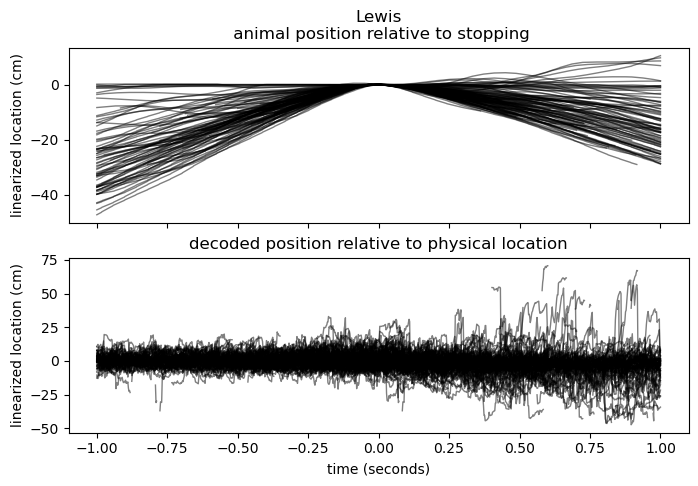

In [624]:
(positions, positions_abs, decodes, decodes_abs) = (triggered_positions[animal], triggered_positions_abs[animal],
     triggered_decodes[animal], triggered_decodes_baseoff[animal])

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 5),sharex=True)

for position in positions:
    ax1.plot(position, linewidth = 1, alpha = 0.5, color = 'k')

row_ind = 0
for rendition_ind in range(len(positions_abs)):
    position_abs = positions_abs[rendition_ind]
    position = positions[rendition_ind]
    decode_abs = decodes_abs[rendition_ind]
    if len(position_abs) == len(decode_abs):
        ax2.plot(position.index, np.array(decode_abs) - np.array(position_abs), linewidth = 1, alpha = 0.5, color = 'k')
    row_ind = row_ind + 1

ax1.set_title(animal + "\n animal position relative to stopping")
ax2.set_title("decoded position relative to physical location")

ax1.set_ylabel("linearized location (cm)")
ax2.set_xlabel("time (seconds)")
ax2.set_ylabel("linearized location (cm)")

#### (a-control: use nearby trials) Mental position vs physical position
This time, we include 2 second before AND 0.5 seconds after turn around.

In [627]:
triggered_positions = {}
triggered_positions_abs = {}
triggered_decodes = {}
triggered_decodes_baseoff = {}
triggered_decodes_abs = {}

animal = 'Lewis'
dates_to_plot = ['20240109','20240110']
#dates_to_plot = ['20240106','20240107','20240108','20240109']
                 #'20240110','20240113']

encoding_set = '2Dheadspeed_above_4'
classifier_param_name = 'default_decoding_gpu_4armMaze'
datafolder = f'/cumulus/shijie/behavior_pilot/Batch1/{animal}'

(triggered_positions[animal], triggered_positions_abs[animal],
 triggered_decodes[animal], triggered_decodes_baseoff[animal], triggered_decodes_abs[animal],
 triggered_trial_info[animal]) = find_triggered_animal(animal,dates_to_plot,
                                                                   delta_t_minus = 2,delta_t_plus = 0.5,
                                                                   max_flag = 0, segment_only = True, nearby = 1)

animal = 'Eliot'
#dates_to_plot = ['20221018','20221019','20221020','20221021','20221022','20221023','20221024','20221025','20221026']
dates_to_plot = ['20221021']
encoding_set = '2Dheadspeed_above_4_andlowmua'
classifier_param_name = 'default_decoding_gpu_4armMaze'
datafolder = f'/cumulus/shijie/behavior_pilot/Batch1/{animal}'

(triggered_positions[animal], triggered_positions_abs[animal],
 triggered_decodes[animal], triggered_decodes_baseoff[animal], triggered_decodes_abs[animal],
 triggered_trial_info[animal]) = find_triggered_animal(animal,dates_to_plot,
                                                                   delta_t_minus = 2,delta_t_plus = 0.5,
                                                                   max_flag = 0, segment_only = True, nearby = 1)

animal = 'Haydn'
dates_to_plot = ['20230606']
encoding_set = '2Dheadspeed_above_4'
classifier_param_name = 'default_decoding_gpu_4arm'
datafolder = f'/cumulus/shijie/behavior_pilot/Batch1/{animal}'

(triggered_positions[animal], triggered_positions_abs[animal],
 triggered_decodes[animal], triggered_decodes_baseoff[animal], triggered_decodes_abs[animal],
 triggered_trial_info[animal]) = find_triggered_animal(animal,dates_to_plot,
                                                                   delta_t_minus = 2,delta_t_plus = 0.5,
                                                                   max_flag = 0, segment_only = True, nearby = 1)

[16:02:09][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
02_Rev2Session1
pos 1 valid times


[16:02:10][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
04_Rev2Session2
pos 3 valid times


[16:02:12][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
06_Rev2Session3
pos 5 valid times


[16:02:13][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
08_Rev2Session4
pos 7 valid times


[16:02:14][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
02_Rev2Session1
pos 1 valid times


[16:02:15][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
04_Rev2Session2
pos 3 valid times


[16:02:16][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
06_Rev2Session3
pos 5 valid times


[16:02:17][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
08_Rev2Session4
pos 7 valid times


[16:02:18][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
10_Rev2Session5
pos 9 valid times


[16:02:18][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
02_Seq2Session1
pos 1 valid times


[16:02:20][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
04_Seq2Session2
pos 3 valid times


[16:02:21][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
06_Seq2Session3
pos 5 valid times


[16:02:22][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
08_Seq2Session4
pos 7 valid times


[16:02:23][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
02_Rev3Session1
pos 1 valid times


[16:02:24][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
04_Rev3Session2
pos 3 valid times


[16:02:25][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
06_Rev3Session3
pos 5 valid times


[16:02:26][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
08_Rev3Session4
pos 7 valid times


[16:02:27][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
10_Rev3Session5
pos 9 valid times


8
9


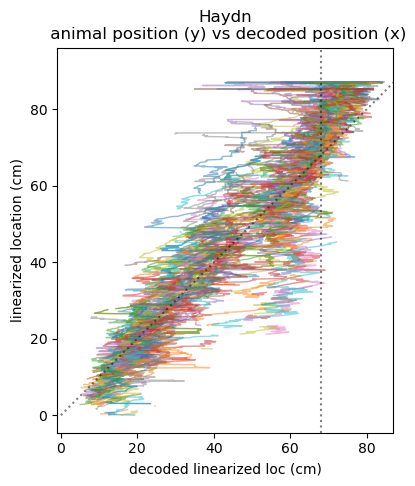

In [629]:
plot_physical_vs_mental_position("Haydn",triggered_positions, triggered_positions_abs,
                                     triggered_decodes, triggered_decodes_baseoff)

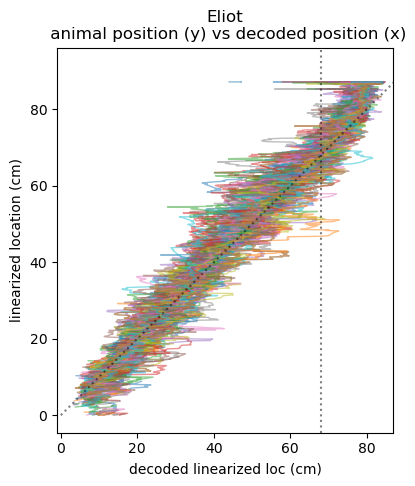

In [630]:
plot_physical_vs_mental_position("Eliot",triggered_positions, triggered_positions_abs,
                                     triggered_decodes, triggered_decodes_baseoff)

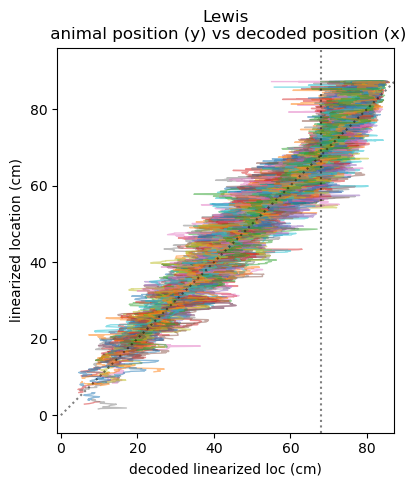

In [631]:
plot_physical_vs_mental_position("Lewis",triggered_positions, triggered_positions_abs,
                                     triggered_decodes, triggered_decodes_baseoff)

#### (c) Find trials with multiple change of minds

In [11]:
triggered_positions1 = {}
triggered_positions_abs1 = {}
triggered_decodes1 = {}
triggered_decodes_abs1 = {}
triggered_decodes_baseoff1 = {}
triggered_trial_info1 = {}

animal = 'Lewis'
dates_to_plot = ['20240109','20240110']
#dates_to_plot = ['20240106','20240107','20240108','20240109']
                 #'20240110','20240113']

encoding_set = '2Dheadspeed_above_4'
classifier_param_name = 'default_decoding_gpu_4armMaze'
datafolder = f'/cumulus/shijie/behavior_pilot/Batch1/{animal}'

(triggered_positions1[animal], triggered_positions_abs1[animal],
 triggered_decodes1[animal], triggered_decodes_baseoff1[animal], triggered_decodes_abs1[animal],
 triggered_trial_info1[animal]) = find_triggered_animal(animal,dates_to_plot,
                                                                   delta_t_minus = 1,delta_t_plus = 1,
                                                                   max_flag = 0, segment_only = True,
                                                                   multiple_CoM = True, first_CoM = True, last_CoM = False)

animal = 'Eliot'
#dates_to_plot = ['20221018','20221019','20221020','20221021','20221022','20221023','20221024','20221025','20221026']
dates_to_plot = ['20221021']
encoding_set = '2Dheadspeed_above_4_andlowmua'
classifier_param_name = 'default_decoding_gpu_4armMaze'
datafolder = f'/cumulus/shijie/behavior_pilot/Batch1/{animal}'

(triggered_positions1[animal], triggered_positions_abs1[animal],
 triggered_decodes1[animal], triggered_decodes_baseoff1[animal], triggered_decodes_abs1[animal],
 triggered_trial_info1[animal]) = find_triggered_animal(animal,dates_to_plot,
                                                                   delta_t_minus = 1,delta_t_plus = 1,
                                                                   max_flag = 0, segment_only = True,
                                                                   multiple_CoM = True, first_CoM = True, last_CoM = False)

animal = 'Haydn'
dates_to_plot = ['20230606']
encoding_set = '2Dheadspeed_above_4'
classifier_param_name = 'default_decoding_gpu_4arm'
datafolder = f'/cumulus/shijie/behavior_pilot/Batch1/{animal}'

(triggered_positions1[animal], triggered_positions_abs1[animal],
 triggered_decodes1[animal], triggered_decodes_baseoff1[animal], triggered_decodes_abs1[animal],
 triggered_trial_info1[animal]) = find_triggered_animal(animal,dates_to_plot,
                                                                   delta_t_minus = 1,delta_t_plus = 1,
                                                                   max_flag = 0, segment_only = True,
                                                                   multiple_CoM = True, first_CoM = True, last_CoM = False)

[14:50:38][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
02_Rev2Session1
pos 1 valid times


[14:50:39][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
04_Rev2Session2
pos 3 valid times


[14:50:39][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
06_Rev2Session3
pos 5 valid times


[14:50:39][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
08_Rev2Session4
pos 7 valid times


[14:50:40][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
02_Rev2Session1
pos 1 valid times


[14:50:40][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
04_Rev2Session2
pos 3 valid times


[14:50:41][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
06_Rev2Session3
pos 5 valid times


[14:50:41][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.
[14:50:41][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
08_Rev2Session4
pos 7 valid times
currently investigating:
10_Rev2Session5
pos 9 valid times


[14:50:41][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
02_Seq2Session1
pos 1 valid times


[14:50:41][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
04_Seq2Session2
pos 3 valid times


[14:50:42][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.
[14:50:42][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
06_Seq2Session3
pos 5 valid times
currently investigating:
08_Seq2Session4
pos 7 valid times


[14:50:42][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
02_Rev3Session1
pos 1 valid times


[14:50:42][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.
[14:50:43][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
04_Rev3Session2
pos 3 valid times
currently investigating:
06_Rev3Session3
pos 5 valid times


[14:50:43][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
08_Rev3Session4
pos 7 valid times


[14:50:43][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
10_Rev3Session5
pos 9 valid times


In [12]:
triggered_positions2 = {}
triggered_positions_abs2 = {}
triggered_decodes2 = {}
triggered_decodes_abs2 = {}
triggered_decodes_baseoff2 = {}
triggered_trial_info2 = {}

animal = 'Lewis'
dates_to_plot = ['20240109','20240110']
#dates_to_plot = ['20240106','20240107','20240108','20240109']
                 #'20240110','20240113']

encoding_set = '2Dheadspeed_above_4'
classifier_param_name = 'default_decoding_gpu_4armMaze'
datafolder = f'/cumulus/shijie/behavior_pilot/Batch1/{animal}'

(triggered_positions2[animal], triggered_positions_abs2[animal],
 triggered_decodes2[animal], triggered_decodes_baseoff2[animal], triggered_decodes_abs2[animal],
 triggered_trial_info2[animal]) = find_triggered_animal(animal,dates_to_plot,
                                                                   delta_t_minus = 1,delta_t_plus = 1,
                                                                   max_flag = 0, segment_only = True,
                                                                   multiple_CoM = True, first_CoM = False, last_CoM = True)

animal = 'Eliot'
#dates_to_plot = ['20221018','20221019','20221020','20221021','20221022','20221023','20221024','20221025','20221026']
dates_to_plot = ['20221021']
encoding_set = '2Dheadspeed_above_4_andlowmua'
classifier_param_name = 'default_decoding_gpu_4armMaze'
datafolder = f'/cumulus/shijie/behavior_pilot/Batch1/{animal}'

(triggered_positions2[animal], triggered_positions_abs2[animal],
 triggered_decodes2[animal], triggered_decodes_baseoff2[animal], triggered_decodes_abs2[animal],
 triggered_trial_info2[animal]) = find_triggered_animal(animal,dates_to_plot,
                                                                   delta_t_minus = 1,delta_t_plus = 1,
                                                                   max_flag = 0, segment_only = True,
                                                                   multiple_CoM = True, first_CoM = False, last_CoM = True)

animal = 'Haydn'
dates_to_plot = ['20230606']
encoding_set = '2Dheadspeed_above_4'
classifier_param_name = 'default_decoding_gpu_4arm'
datafolder = f'/cumulus/shijie/behavior_pilot/Batch1/{animal}'

(triggered_positions2[animal], triggered_positions_abs2[animal],
 triggered_decodes2[animal], triggered_decodes_baseoff2[animal], triggered_decodes_abs2[animal],
 triggered_trial_info2[animal]) = find_triggered_animal(animal,dates_to_plot,
                                                                   delta_t_minus = 1,delta_t_plus = 1,
                                                                   max_flag = 0, segment_only = True,
                                                                   multiple_CoM = True, first_CoM = False, last_CoM = True)

[14:52:07][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
02_Rev2Session1
pos 1 valid times


[14:52:07][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
04_Rev2Session2
pos 3 valid times


[14:52:07][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
06_Rev2Session3
pos 5 valid times


[14:52:08][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
08_Rev2Session4
pos 7 valid times


[14:52:08][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
02_Rev2Session1
pos 1 valid times


[14:52:08][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
04_Rev2Session2
pos 3 valid times


[14:52:09][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
06_Rev2Session3
pos 5 valid times


[14:52:09][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.
[14:52:09][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.
[14:52:09][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
08_Rev2Session4
pos 7 valid times
currently investigating:
10_Rev2Session5
pos 9 valid times
currently investigating:
02_Seq2Session1
pos 1 valid times


[14:52:10][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
04_Seq2Session2
pos 3 valid times


[14:52:10][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.
[14:52:10][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
06_Seq2Session3
pos 5 valid times
currently investigating:
08_Seq2Session4
pos 7 valid times


[14:52:11][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
02_Rev3Session1
pos 1 valid times


[14:52:11][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.
[14:52:11][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
04_Rev3Session2
pos 3 valid times
currently investigating:
06_Rev3Session3
pos 5 valid times


[14:52:11][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
08_Rev3Session4
pos 7 valid times


[14:52:12][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
10_Rev3Session5
pos 9 valid times


In [16]:
triggered_positions3 = {}
triggered_positions_abs3 = {}
triggered_decodes3 = {}
triggered_decodes_abs3 = {}
triggered_decodes_baseoff3 = {}
triggered_trial_info3 = {}

animal = 'Lewis'
dates_to_plot = ['20240109','20240110']
#dates_to_plot = ['20240106','20240107','20240108','20240109']
                 #'20240110','20240113']

encoding_set = '2Dheadspeed_above_4'
classifier_param_name = 'default_decoding_gpu_4armMaze'
datafolder = f'/cumulus/shijie/behavior_pilot/Batch1/{animal}'

(triggered_positions3[animal], triggered_positions_abs3[animal],
 triggered_decodes3[animal], triggered_decodes_baseoff3[animal], triggered_decodes_abs3[animal],
 triggered_trial_info3[animal]) = find_triggered_animal(animal,dates_to_plot,
                                                                   delta_t_minus = 1,delta_t_plus = 1,
                                                                   max_flag = 0, segment_only = True,
                                                                   multiple_CoM = False,  single_CoM = True,
                                                                    first_CoM = False, last_CoM = False)

animal = 'Eliot'
#dates_to_plot = ['20221018','20221019','20221020','20221021','20221022','20221023','20221024','20221025','20221026']
dates_to_plot = ['20221021']
encoding_set = '2Dheadspeed_above_4_andlowmua'
classifier_param_name = 'default_decoding_gpu_4armMaze'
datafolder = f'/cumulus/shijie/behavior_pilot/Batch1/{animal}'

(triggered_positions3[animal], triggered_positions_abs3[animal],
 triggered_decodes3[animal], triggered_decodes_baseoff3[animal], triggered_decodes_abs3[animal],
 triggered_trial_info3[animal]) = find_triggered_animal(animal,dates_to_plot,
                                                                   delta_t_minus = 1,delta_t_plus = 1,
                                                                   max_flag = 0, segment_only = True,
                                                                   multiple_CoM = False,  single_CoM = True,
                                                                    first_CoM = False, last_CoM = False)

animal = 'Haydn'
dates_to_plot = ['20230606']
encoding_set = '2Dheadspeed_above_4'
classifier_param_name = 'default_decoding_gpu_4arm'
datafolder = f'/cumulus/shijie/behavior_pilot/Batch1/{animal}'

(triggered_positions3[animal], triggered_positions_abs3[animal],
 triggered_decodes3[animal], triggered_decodes_baseoff3[animal], triggered_decodes_abs3[animal],
 triggered_trial_info3[animal]) = find_triggered_animal(animal,dates_to_plot,
                                                                   delta_t_minus = 1,delta_t_plus = 1,
                                                                   max_flag = 0, segment_only = True,
                                                                   multiple_CoM = False,  single_CoM = True,
                                                                    first_CoM = False, last_CoM = False)

[14:59:47][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	TrackGraph -> spyglass.linearization.v0.main.TrackGraph
Please use the new location.
[14:59:47][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	TrackGraph -> spyglass.linearization.v0.main.TrackGraph
Please use the new location.
[14:59:48][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
02_Rev2Session1
pos 1 valid times


[14:59:48][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
04_Rev2Session2
pos 3 valid times


[14:59:49][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
06_Rev2Session3
pos 5 valid times


[14:59:50][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
08_Rev2Session4
pos 7 valid times


[14:59:51][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
02_Rev2Session1
pos 1 valid times


[14:59:51][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
04_Rev2Session2
pos 3 valid times


[14:59:53][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
06_Rev2Session3
pos 5 valid times


[14:59:53][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
08_Rev2Session4
pos 7 valid times


[14:59:54][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
10_Rev2Session5
pos 9 valid times


[14:59:54][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
02_Seq2Session1
pos 1 valid times


[14:59:55][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
04_Seq2Session2
pos 3 valid times


[14:59:56][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
06_Seq2Session3
pos 5 valid times


[14:59:57][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
08_Seq2Session4
pos 7 valid times


[14:59:57][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
02_Rev3Session1
pos 1 valid times


[14:59:58][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
04_Rev3Session2
pos 3 valid times


[15:00:00][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
06_Rev3Session3
pos 5 valid times


[15:00:01][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
08_Rev3Session4
pos 7 valid times


[15:00:02][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
10_Rev3Session5
pos 9 valid times


time
1.704829e+09    3.797803
1.704829e+09    3.854218
1.704829e+09    3.910634
1.704829e+09    3.967049
1.704829e+09    4.023465
                  ...   
1.704829e+09    5.189019
1.704829e+09    5.153081
1.704829e+09    5.117144
1.704829e+09    5.081206
1.704829e+09    5.045269
Length: 1001, dtype: float64

In [44]:
length_by_ind

array([40, 22, 36,  0, 39, 29, 38, 20,  9, 17, 37, 53, 24, 28,  7, 21, 42,
       18,  8, 33, 19, 25, 51, 55, 45,  4, 12, 52, 47,  5, 46,  1,  2, 50,
       49, 48, 44, 43,  3, 41, 16,  6, 10, 11, 35, 34, 32, 31, 30, 13, 14,
       54, 26, 15, 23, 27])

In [48]:
import matplotlib.cm as cm
from matplotlib.colors import Normalize

Text(0.5, 1.0, 'decoded - physical, single C-o-M')

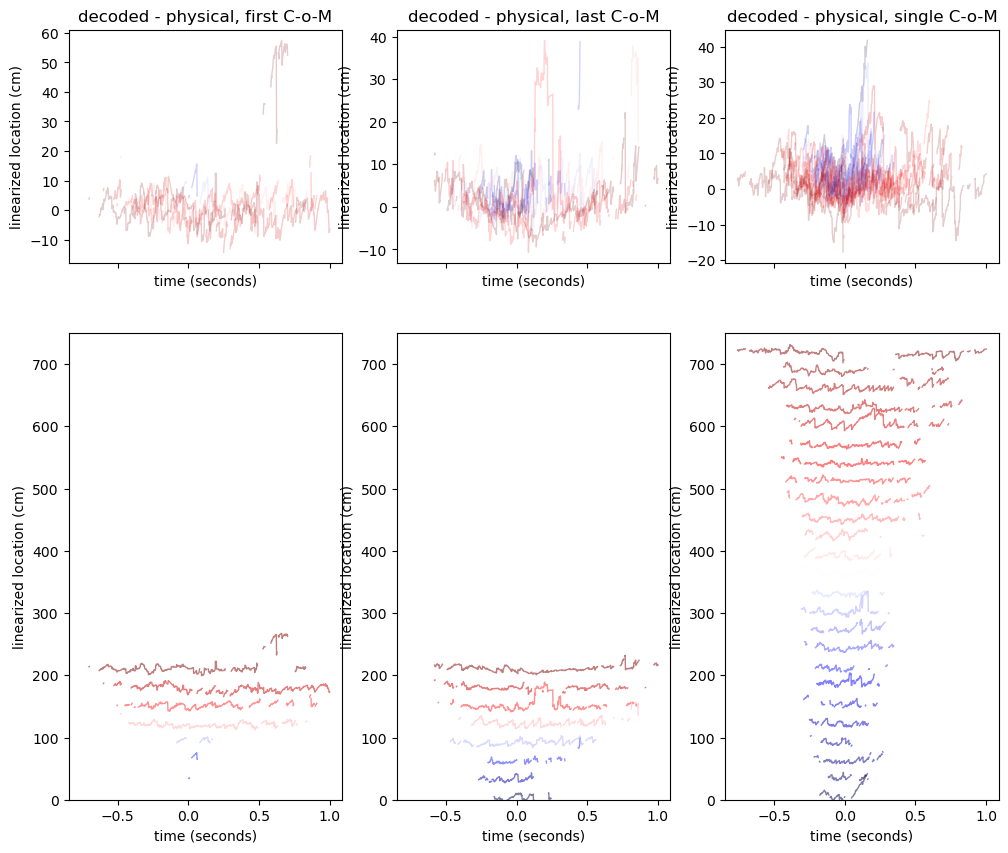

In [79]:
animal = "Eliot"


cmap = cm.seismic


fig, axes = plt.subplots(2, 3, figsize=(12, 10),sharex=True,gridspec_kw={"height_ratios": [1,2]})

for version in range(3):
    if version == 0:
        (positions, positions_abs, decodes, decodes_abs) = (triggered_positions1[animal], triggered_positions_abs1[animal],
             triggered_decodes1[animal], triggered_decodes_baseoff1[animal])
    elif version == 1:
        (positions, positions_abs, decodes, decodes_abs) = (triggered_positions2[animal], triggered_positions_abs2[animal],
             triggered_decodes2[animal], triggered_decodes_baseoff2[animal])
    elif version == 2:
        (positions, positions_abs, decodes, decodes_abs) = (triggered_positions3[animal], triggered_positions_abs3[animal],
             triggered_decodes3[animal], triggered_decodes_baseoff3[animal])

    # sort by trace length
    length = [len(tt) for tt in positions]
    ind_by_length = np.argsort(length)
    norm = Normalize(vmin=0, vmax=len(ind_by_length) - 1)
    
    #for position in positions:
    #    axes[0,version].plot(position, linewidth = 1, alpha = 0.5, color = 'k')

    row_ind = 0
    for rendition_ind in ind_by_length:
        
        position_abs = positions_abs[rendition_ind]
        position = positions[rendition_ind]
        decode_abs = decodes_abs[rendition_ind]
        if len(position_abs) == len(decode_abs):
            axes[1,version].plot(position.index, (np.array(decode_abs) - np.array(position_abs) + row_ind*30),
                                 linewidth = 1, alpha = 0.5, color = cmap(norm(row_ind)))
        row_ind = row_ind + 1
        
    row_ind = 0
    
    for rendition_ind in ind_by_length:
        position_abs = positions_abs[rendition_ind]
        position = positions[rendition_ind]
        decode_abs = decodes_abs[rendition_ind]
        if len(position_abs) == len(decode_abs):
            axes[0,version].plot(position.index, (np.array(decode_abs) - np.array(position_abs)),
                                 linewidth = 1, alpha = 0.2, color = cmap(norm(row_ind)))
        row_ind = row_ind + 1
    
    
    #axes[0version].set_ylabel("linearized location (cm)")
    axes[1,version].set_xlabel("time (seconds)")
    axes[1,version].set_ylabel("linearized location (cm)")

    axes[0,version].set_xlabel("time (seconds)")
    axes[0,version].set_ylabel("linearized location (cm)")
    axes[1,version].set_ylim([0, len(triggered_decodes3[animal]) * 30])

axes[0,0].set_title(animal + "\n animal posi relative to stop, first C-o-M")
axes[0,0].set_title("decoded - physical, first C-o-M")
axes[0,1].set_title(animal + "\n animal position relative to stopping, last C-o-M")
axes[0,1].set_title("decoded - physical, last C-o-M")
axes[0,2].set_title(animal + "\n animal position relative to stopping, single C-o-M")
axes[0,2].set_title("decoded - physical, single C-o-M")



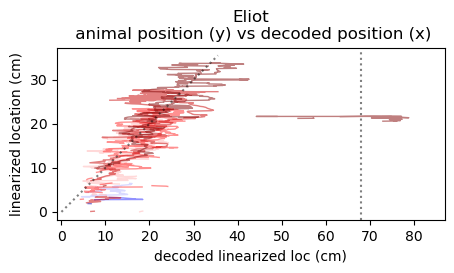

In [81]:
animal = "Eliot"
plot_physical_vs_mental_position(animal, triggered_positions_abs1[animal], triggered_decodes_baseoff1[animal])

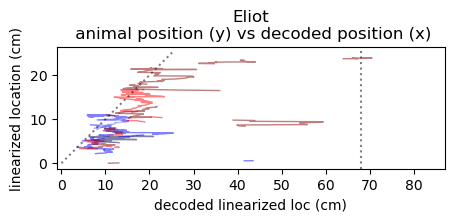

In [77]:
animal = "Haydn"
plot_physical_vs_mental_position("Eliot", triggered_positions_abs2[animal], triggered_decodes_baseoff2[animal])

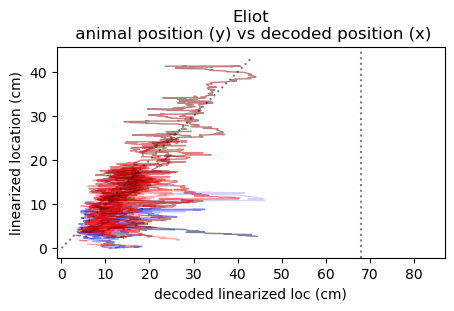

In [82]:
animal = "Eliot"
plot_physical_vs_mental_position(animal, triggered_positions_abs3[animal], triggered_decodes_baseoff3[animal])

## End here

In [609]:
animal = 'Eliot'

In [636]:
animal = 'Eliot'
dates_to_plot = ['20221021']
encoding_set = '2Dheadspeed_above_4_andlowmua'
classifier_param_name = 'default_decoding_gpu_4armMaze'
datafolder = f'/cumulus/shijie/behavior_pilot/Batch1/{animal}'

(triggered_positions[animal], triggered_positions_abs[animal],
 triggered_decodes[animal], triggered_decodes_baseoff[animal], triggered_decodes_abs[animal]) = find_triggered_animal(animal,dates_to_plot,
                                                                   delta_t_minus = 2,delta_t_plus = 0.5,
                                                                   max_flag = 0, segment_only = False, nearby = 1)

[18:41:33][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
02_Seq2Session1
pos 1 valid times


[18:41:35][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
04_Seq2Session2
pos 3 valid times


[18:41:36][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
06_Seq2Session3
pos 5 valid times


[18:41:37][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
08_Seq2Session4
pos 7 valid times


In [632]:
(triggered_pos, triggered_pos_abs,
 triggered_dec, triggered_dec_abs) = (triggered_positions[animal], triggered_positions_abs[animal],
 triggered_decodes[animal], triggered_decodes_abs[animal]) 

In [633]:
triggered_dec_abs[0]

1.686072e+09           NaN
1.686072e+09           NaN
1.686072e+09           NaN
1.686072e+09           NaN
1.686072e+09           NaN
                   ...    
1.686072e+09    732.210120
1.686072e+09    731.747652
1.686072e+09    731.612566
1.686072e+09    731.640185
1.686072e+09    731.673369
Length: 1250, dtype: float64

In [ ]:
# 1. find time points out side of arm position

In [ ]:
# 2. for each time interval, find arm
    # decode should pass certain criteria:
    # (a) be continuous
    # (b) posterior >= threshold%
# 3. return for each trial a list of time range and arm identity for the decode

In [ ]:
ind = 0
pos = triggered_pos[ind]
pos_abs = triggered_pos_abs[ind]
dec_abs = triggered_dec_abs[ind]


In [661]:
from spyglass.shijiegu.changeOfMind_remote import find_remote_theta_session, find_triggered_session

In [666]:
animal = 'Lewis'
nwb_copy_file_name = 'lewis20240109_.nwb'
session_name = '08_Rev2Session4'
position_name = 'pos 7 valid times'

In [719]:
animal = 'Lewis'
nwb_copy_file_name = 'lewis20240110_.nwb'
session_name = '04_Rev2Session2'
position_name = 'pos 3 valid times'

In [720]:
(triggered_positions, triggered_positions_abs,
     triggered_decodes, triggered_decodes_baseoff,
     triggered_decodes_abs) = find_triggered_session(
         nwb_copy_file_name,session_name,position_name,
         delta_t_minus = 1,delta_t_plus = 1,max_flag = 0,segment_only = False,nearby = False)

[22:26:21][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
04_Rev2Session2
pos 3 valid times


In [721]:
(trials_session,
 time_intervals_session,arm_identity_session) = find_remote_theta_session(nwb_copy_file_name,session_name,
                                                                          position_name,delta_t_minus = 1,delta_t_plus = 3,
                                                                          max_flag = True,nearby =False)

[22:26:24][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
04_Rev2Session2
pos 3 valid times


[22:26:24][WARNING] Spyglass: Deprecation: this class has been moved out of spyglass.common.common_position
	IntervalLinearizedPosition -> spyglass.linearization.v0.main.IntervalLinearizedPosition
Please use the new location.


currently investigating:
04_Rev2Session2
pos 3 valid times


In [722]:
trials_session

[[15],
 [17, 17, 17, 17, 17, 17, 17, 17, 17, 17],
 [22],
 [24, 24],
 [26],
 [45],
 [45, 45],
 [60],
 [65, 65, 65],
 [65, 65, 65, 65, 65],
 [73, 73, 73]]

In [723]:
arm_identity_session

[[2],
 [2, 2, 2, 2, 2, 2, 2, 2, 2, 2],
 [1],
 [2, 4],
 [2],
 [2],
 [2, 2],
 [2],
 [2, 2, 2],
 [2, 2, 2, 2, 2],
 [2, 2, 2]]

In [726]:
log_df.loc[2,"OuterWellIndex"]

4.0

In [725]:
log_df

,timestamp_H,Home,timestamp_O,OuterWellIndex,rewardNum,current,future_H,future_O,past,past_reward
1,1.666389e+09,1.0,1.666389e+09,1.0,1.0,1.0,1.0,4.0,NaN,NaN
2,1.666389e+09,1.0,1.666389e+09,4.0,1.0,4.0,4.0,3.0,1.0,NaN
3,1.666389e+09,1.0,1.666389e+09,3.0,2.0,3.0,3.0,2.0,4.0,NaN
4,1.666389e+09,1.0,1.666389e+09,2.0,1.0,2.0,2.0,4.0,3.0,3.0
5,1.666389e+09,1.0,1.666389e+09,4.0,2.0,4.0,4.0,1.0,2.0,3.0
...,...,...,...,...,...,...,...,...,...,...
78,1.666391e+09,1.0,1.666391e+09,3.0,2.0,3.0,3.0,4.0,4.0,1.0
79,1.666391e+09,1.0,1.666391e+09,4.0,2.0,4.0,4.0,1.0,3.0,3.0
80,1.666391e+09,1.0,1.666391e+09,1.0,1.0,1.0,1.0,2.0,4.0,4.0
81,1.666391e+09,1.0,1.666391e+09,2.0,2.0,2.0,2.0,NaN,1.0,4.0


In [521]:
def rebin_time2index(time_data, new_bin_edges):
    """array([0, 1, 1, 2, 3]) = ebin_time2index([0.5,0.6,1,2,3], np.arange(10))"""
    rebinned_data = np.zeros(len(time_data))
    for i in range(len(time_data)):
        mask = np.abs(time_data[i] - new_bin_edges)
        target_bin = np.argmin(mask)
        rebinned_data[i] = target_bin
    return rebinned_data.astype("int")

Text(0, 0.5, 'linearized location (cm)')

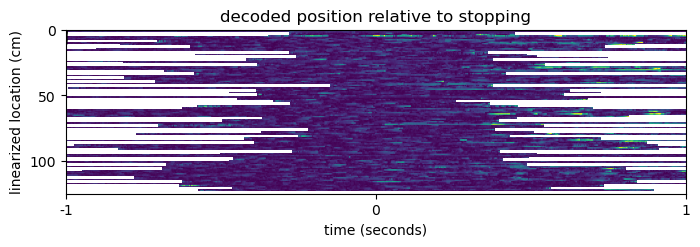

In [552]:
(positions, positions_abs, decodes, decodes_abs) = (triggered_positions[animal], triggered_positions_abs[animal],
     triggered_decodes[animal], triggered_decodes_abs[animal])

fig, (ax1) = plt.subplots(1, 1, figsize=(8, 10),sharex=False)

for position in positions:
    ax1.plot(position, linewidth = 1, alpha = 0.5, color = 'k')

time_axis = np.arange(-1,1,0.0021)
decode_minus_physical = np.zeros((len(positions_abs),len(time_axis))) + np.nan

row_ind = 0
for rendition_ind in range(len(positions_abs)):
    position_abs = positions_abs[rendition_ind]
    position = positions[rendition_ind]
    decode_abs = decodes_abs[rendition_ind]
    if len(position_abs) == len(decode_abs):
        x = position.index
        x_ind = rebin_time2index(x, time_axis)
        y = np.abs(np.array(decode_abs) - np.array(position_abs))
        decode_minus_physical[row_ind, x_ind] = y
        row_ind += 1
        

ax1.imshow(decode_minus_physical,aspect = 2,vmax = 50)
xticks = rebin_time2index([time_axis[0],0,time_axis[-1]], time_axis)
ax1.set_xticks(xticks)
ax1.set_xticklabels(["-1","0","1"])

#ax1.set_title("animal position relative to stopping")
ax1.set_title("decoded position relative to stopping")

#ax1.set_ylabel("linearized location (cm)")
ax1.set_xlabel("time (seconds)")
ax1.set_ylabel("linearized location (cm)")